# USA House Price Prediction

<img src="https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2021/03/chaitali-majumder/house-price-497112-KhCJQICS.jpg" style="width: 100%; height: 250px; object-fit: cover;">

## Project Overview

This project aims to predict house prices using a dataset containing features such as property size, location, and condition. The goal is to build a machine learning model to estimate property values accurately.

## Key Features

- **Date:** Sale date of the property.
- **Price:** Target variable (sale price in USD).
- **Bedrooms:** Number of bedrooms.
- **Bathrooms:** Number of bathrooms.
- **Sqft Living:** Living area size (sqft).
- **Sqft Lot:** Lot size (sqft).
- **Floors:** Number of floors.
- **Waterfront:** Waterfront view (1 = yes, 0 = no).
- **View:** View quality (0-4).
- **Condition:** Property condition (1-5).
- **Sqft Above:** Above-ground area (sqft).
- **Sqft Basement:** Basement area (sqft).
- **Yr Built:** Year built.
- **Yr Renovated:** Year last renovated.
- **Street, City, Statezip, Country:** Location details.

## ML Pipeline

<img src="https://www.mdpi.com/analytics/analytics-03-00003/article_deploy/html/images/analytics-03-00003-g001.png" style="width: 100%; height: 400px; object-fit: fill;">


In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [2]:
raw_df = pd.read_csv('./USA Housing Dataset.csv')
housing_df = raw_df.copy()
housing_df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [4]:
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [5]:
housing_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

## Exploratory Analysis and Visualization

<Axes: ylabel='price'>

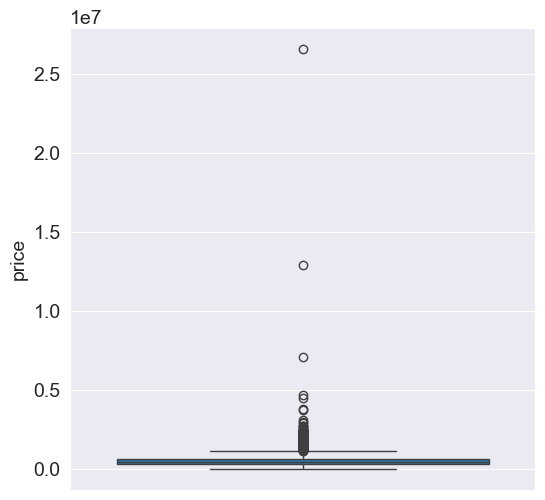

In [7]:
plt.figure(figsize=(6, 6))
sns.boxplot(housing_df['price'])

In [8]:
# Let's remove the outliers using the IQR method

def remove_outliers_zscore(df, threshold=3):
    df1 = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        z_scores = np.abs(stats.zscore(df1[col]))
        df1 = df1[z_scores < threshold]
    return df1

housing_df = remove_outliers_zscore(housing_df)
housing_df.shape

(3742, 18)

<Axes: xlabel='sqft_living', ylabel='price'>

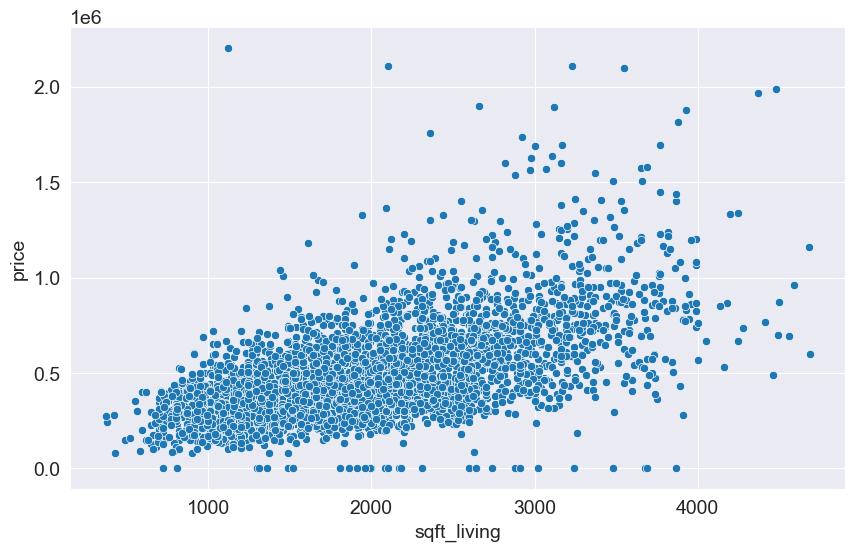

In [9]:
sns.scatterplot(housing_df, x='sqft_living', y='price')

In [10]:
fig = px.histogram(x=housing_df['price'],marginal='box', nbins=50, title='Price Distribution',color_discrete_sequence=['red'])
fig.update_layout(bargap = 0.1)
fig.show()

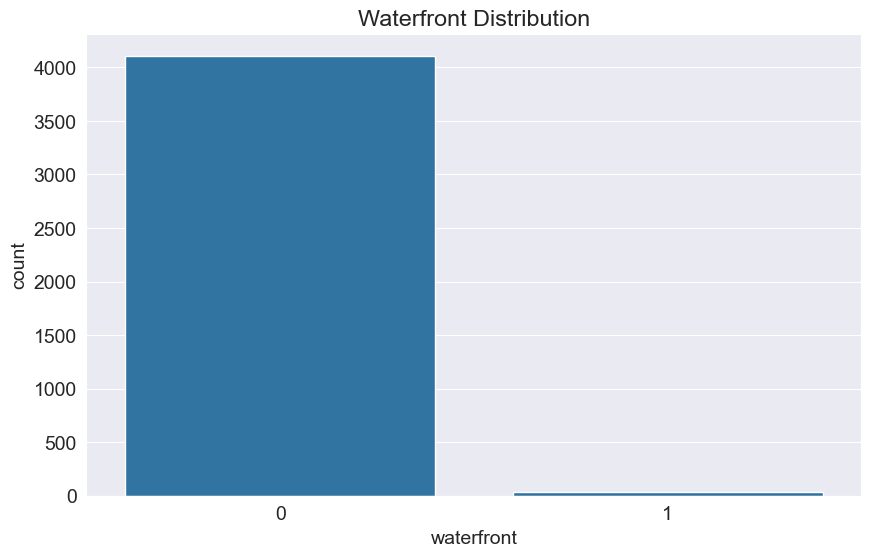

In [11]:
sns.countplot(raw_df, x='waterfront')
plt.title('Waterfront Distribution')
plt.show()

In [12]:
plt.figure(figsize=(15, 6))
px.histogram(housing_df, x='price', y='city', color='city', title='City wise price distribution')

<Figure size 1500x600 with 0 Axes>

In [13]:
plt.figure(figsize=(15, 6))
fig = px.histogram(housing_df, y="price", x='bathrooms', color="bathrooms", title='Bathrooms vs Price')  
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1500x600 with 0 Axes>

In [14]:
plt.figure(figsize=(15, 6))
fig = px.histogram(housing_df, y="sqft_above", x='sqft_living', color="bedrooms", title='Sqft Living vs Sqft Above')  
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1500x600 with 0 Axes>

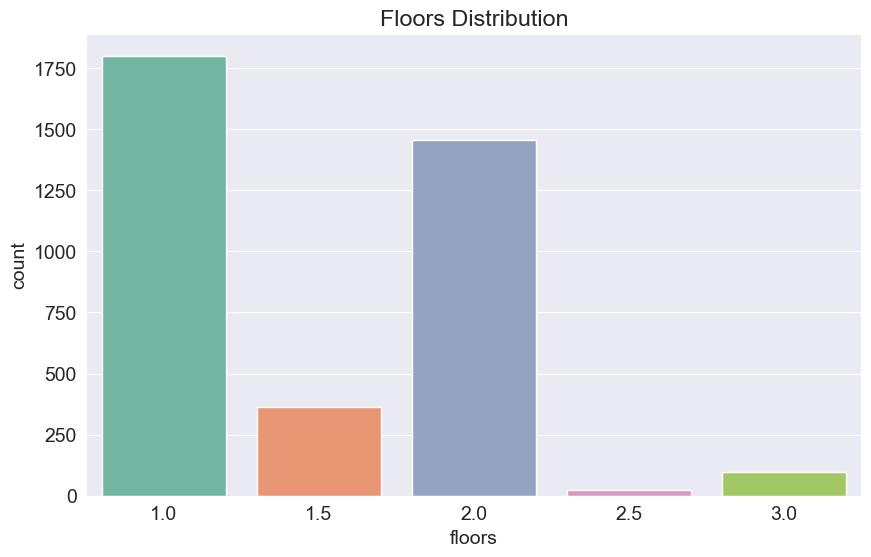

In [15]:
sns.countplot(x="floors",data=housing_df, palette='Set2')  
plt.title('Floors Distribution')
plt.show()

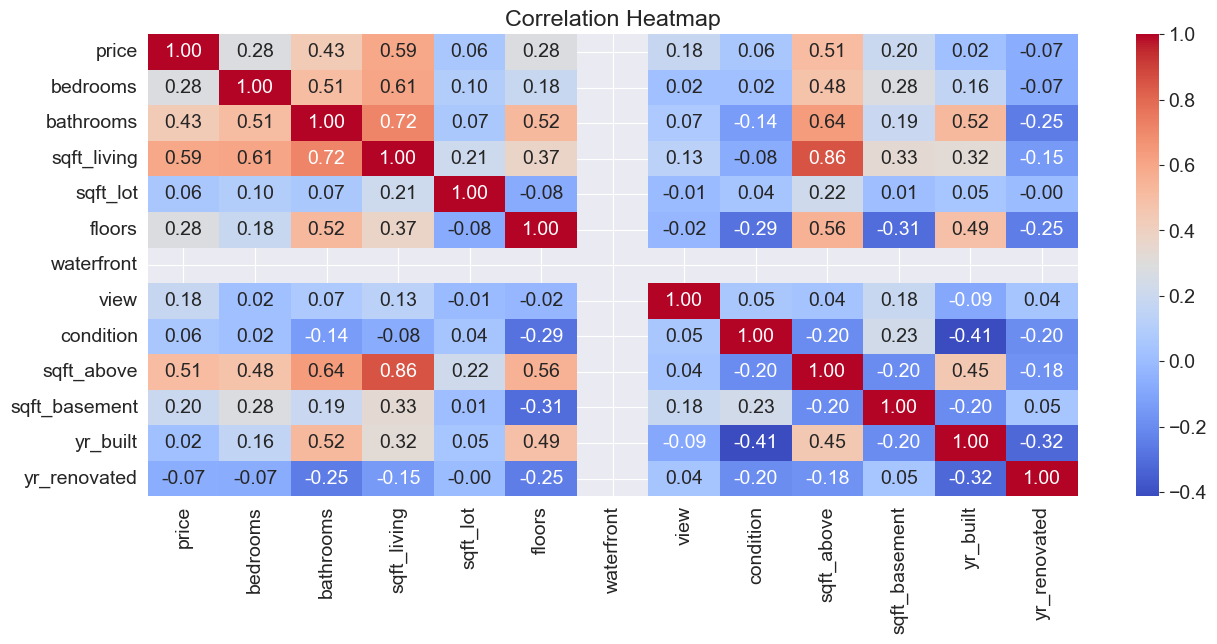

In [16]:
plt.figure(figsize=(15, 6))
numeric_cols = housing_df.select_dtypes(include=[np.number]).columns
sns.heatmap(housing_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Pre-Processing

In [17]:
housing_df = housing_df.drop(['country', 'street', 'date'], axis=1).copy()
housing_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,376000.000000,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle,WA 98103
3,324000.000000,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,Seattle,WA 98117
4,549900.000000,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,Seattle,WA 98146
5,320000.000000,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,2003,0,Maple Valley,WA 98038
6,875000.000000,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007,Seattle,WA 98103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4136,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4137,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059
4138,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178


In [18]:
housing_df['statezip']= housing_df['statezip'].str.extract(r'(\d+)').astype(int)

In [19]:
train_df, val_test_df = train_test_split(housing_df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=42)

In [20]:
print(f"Train Shape: {train_df.shape}")
print(f"Validation Shape: {val_df.shape}")
print(f"Test Shape: {test_df.shape}")

Train Shape: (2993, 15)
Validation Shape: (374, 15)
Test Shape: (375, 15)


### Encoding Categorical Data

In [21]:
encoder = LabelEncoder()
encoder.fit(train_df[['city']])

LabelEncoder()

In [22]:
train_df['city'] = encoder.transform(train_df[['city']])
val_df['city'] = encoder.transform(val_df[['city']])
test_df['city'] = encoder.transform(test_df[['city']])

### Scaling Data

In [23]:
input_cols = train_df.columns.tolist()[1:]
target_col = 'price'

In [24]:
scaler = StandardScaler().fit(train_df[input_cols])
train_df[input_cols] = scaler.transform(train_df[input_cols])
val_df[input_cols] = scaler.transform(val_df[input_cols])
test_df[input_cols] = scaler.transform(test_df[input_cols])

In [25]:
train_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
count,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03,2993.0,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03,2.993000e+03
mean,4.923550e+05,-1.839862e-16,1.210748e-16,-1.661811e-17,-1.780511e-17,-8.309053e-18,0.0,-4.035826e-17,4.748030e-18,-8.131002e-17,2.848818e-17,6.243660e-16,-4.688680e-17,-8.398079e-17,-3.967692e-14
std,2.528804e+05,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,0.0,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,0.000000e+00,-2.745710e+00,-1.920700e+00,-2.164195e+00,-8.301469e-01,-9.433688e-01,0.0,-2.339595e-01,-2.172323e+00,-1.878834e+00,-6.828360e-01,-2.348406e+00,-8.277149e-01,-2.204634e+00,-1.508501e+00
25%,3.145000e+05,-4.030903e-01,-4.696606e-01,-7.503389e-01,-4.537413e-01,-9.433688e-01,0.0,-2.339595e-01,-6.776648e-01,-7.670726e-01,-6.828360e-01,-6.521114e-01,-8.277149e-01,-7.169944e-01,-8.807177e-01
50%,4.448450e+05,-4.030903e-01,2.558590e-01,-1.234403e-01,-2.358083e-01,-4.704299e-03,0.0,-2.339595e-01,-6.776648e-01,-2.806770e-01,-6.828360e-01,1.461447e-01,-8.277149e-01,5.081207e-01,-1.197676e-01
75%,6.150000e+05,7.682196e-01,6.186187e-01,6.635176e-01,1.856953e-03,9.339602e-01,0.0,-2.339595e-01,8.169931e-01,6.504231e-01,7.051617e-01,8.778794e-01,1.212923e+00,7.706454e-01,6.982537e-01
max,2.199900e+06,3.110839e+00,3.157937e+00,3.597937e+00,8.931757e+00,2.811289e+00,0.0,4.628823e+00,2.311651e+00,3.165783e+00,3.127848e+00,1.443311e+00,1.228235e+00,1.470711e+00,5.206883e+00


In [26]:
train_inputs = train_df.drop('price', axis=1)
train_targets = train_df['price']
val_inputs = val_df.drop('price', axis=1)
val_targets = val_df['price']
test_inputs = test_df.drop('price', axis=1)
test_targets = test_df['price']

In [27]:
train_inputs

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4131,-0.40309,-0.469661,-0.150117,-0.381652,-0.943369,0.0,-0.233959,0.816993,-1.086704,1.689378,-0.851675,-0.827715,0.770645,0.869467
530,-0.40309,-0.832420,-0.456897,-0.014718,-0.943369,0.0,-0.233959,-0.677665,-0.878249,0.730398,-0.119941,1.225173,-0.979519,-1.470454
2392,0.76822,-1.557940,-0.016734,0.021589,-0.943369,0.0,-0.233959,0.816993,-0.405750,0.705162,-0.086680,-0.827715,-0.892011,-1.013884
3634,-1.57440,-1.557940,-1.483944,-0.535302,-0.943369,0.0,-0.233959,-0.677665,-1.170086,-0.682836,-1.017979,1.209861,0.770645,0.698254
2845,-0.40309,0.618619,0.823577,-0.227477,0.933960,0.0,-0.233959,-0.677665,1.234098,-0.682836,0.844619,-0.827715,0.420613,-0.538290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,0.76822,-0.469661,-0.270161,0.155331,-0.943369,0.0,-0.233959,0.816993,-0.322368,0.074254,-0.053419,-0.827715,-0.892011,-1.013884
1428,-0.40309,-0.832420,-0.763677,-0.491452,-0.943369,0.0,-0.233959,-0.677665,-0.419647,-0.682836,-0.386026,1.202715,0.770645,0.431921
954,-0.40309,2.069658,-0.523588,-0.760601,0.933960,0.0,-0.233959,-0.677665,-0.669794,0.225672,1.177225,-0.827715,0.770645,0.698254
3868,0.76822,0.618619,0.183340,2.249329,-0.943369,0.0,-0.233959,-0.677665,-0.322368,0.932289,0.312448,-0.827715,0.595629,-0.100744


## Model Training and Evaluation

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [29]:
linear_model = LinearRegression()
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [30]:
linear_pred = linear_model.predict(val_inputs)
linear_rmse = root_mean_squared_error(val_targets, linear_pred)
print(f"Linear Regression RMSE: {linear_rmse}")

Linear Regression RMSE: 183175.32452804077


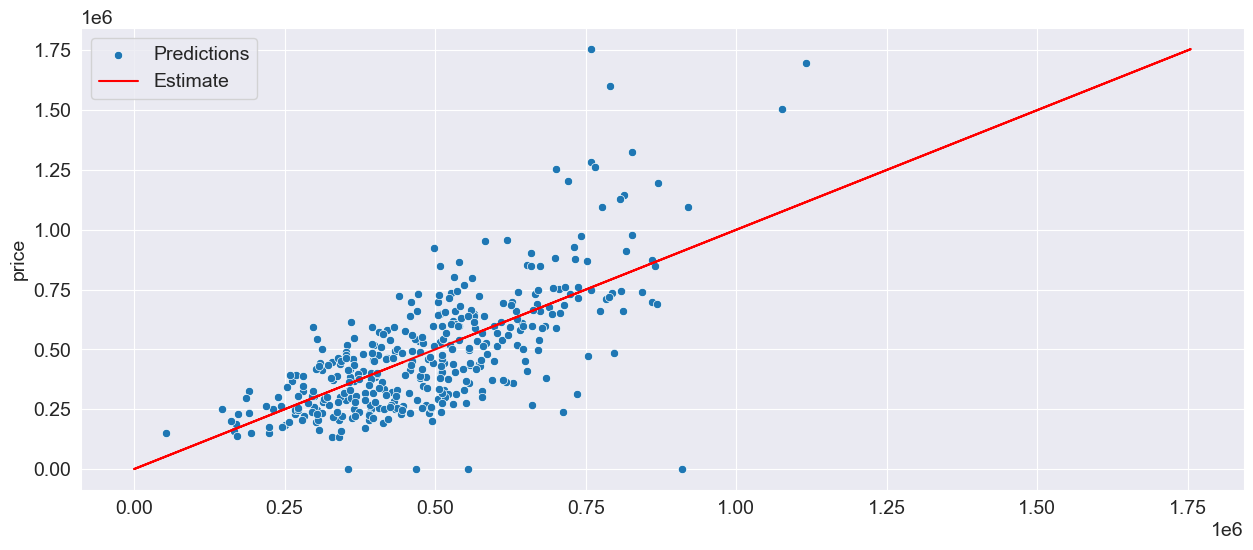

In [31]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=linear_pred, y=val_targets)
plt.plot(val_targets, val_targets, 'r')
plt.legend(['Predictions', 'Estimate'])

In [32]:
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    results = {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2,
    }
    results_df = pd.DataFrame([results])
    return results_df

In [33]:
all_metrics_df = pd.DataFrame()

# List of models and their names
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("XGBoost", XGBRegressor()),
    ('extraTrees', ExtraTreesRegressor()),
    ('mlp', MLPRegressor()),
    ('svr',SVR()),
    ('elasticNet',ElasticNet())
]

for name, model in models:
    model.fit(train_inputs, train_targets)
    metrics_df = evaluate_model(model, val_inputs, val_targets, name)
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)
all_metrics_df.sort_values(by='MAE')

,Model,MAE,MSE,RMSE,R-squared
7,XGBoost,83488.087067,1.746946e+10,132172.072541,0.739035
4,Random Forest,89869.663779,2.052831e+10,143277.036318,0.693341
5,Gradient Boosting,94367.209099,2.084296e+10,144370.908621,0.688641
8,extraTrees,101637.290903,2.452616e+10,156608.300882,0.633620
3,Decision Tree,124228.912844,4.010776e+10,200269.219855,0.400856
0,Linear Regression,132796.159477,3.355320e+10,183175.324528,0.498770
2,Lasso Regression,132796.297324,3.355315e+10,183175.196295,0.498771
1,Ridge Regression,132800.158465,3.355583e+10,183182.517890,0.498731
11,elasticNet,141816.430909,3.810758e+10,195211.638298,0.430735
6,AdaBoost,164672.053727,4.618221e+10,214900.457458,0.310114


In [34]:
def try_model(model_name,model, **params):
    model = model(**params)
    model.fit(train_inputs, train_targets)
    val_pred = model.predict(val_inputs)
    test_pred = model.predict(test_inputs)
    val_rmse = root_mean_squared_error(val_targets, val_pred)
    test_rmse = root_mean_squared_error(test_targets, test_pred)
    val_r2 = r2_score(val_targets, val_pred)
    test_r2 = r2_score(test_targets, test_pred)
    result = {
        'Model': model_name,
        'Val RMSE': val_rmse,
        'Test RMSE': test_rmse,
        'Val R Squared': val_r2,
        'Test R Squared': test_r2
    }
    return result

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [36]:
param_grid_xgb = {
    'regressor_xgb__n_estimators': [300,100,200, 250],  
    'regressor_xgb__max_depth': [3, 5, 7, 9],  
    'regressor_xgb__learning_rate': [0.1, 0.5, 0.75, 0.01]
}

pipeline_xgb = Pipeline([('regressor_xgb', XGBRegressor())])
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=4)
search_xgb.fit(train_inputs, train_targets)
search_xgb.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'regressor_xgb__learning_rate': 0.1,
 'regressor_xgb__max_depth': 3,
 'regressor_xgb__n_estimators': 300}

In [37]:
try_model('XGBoost', XGBRegressor, learning_rate=0.1, max_depth=3, n_estimators=300)

{'Model': 'XGBoost',
 'Val RMSE': 129769.89656192255,
 'Test RMSE': 152538.81612296842,
 'Val R Squared': 0.7484347606625525,
 'Test R Squared': 0.6701532826245382}

In [38]:
model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=300).fit(train_inputs, train_targets)

### Predicting Single Input

In [39]:
def predict_input(single_input):
    if (single_input['country'] != 'USA'):
        return 'This model only works for USA properties'
    input_df = pd.DataFrame([single_input])
    input_df = input_df.drop(['country', 'street', 'date'], axis=1)
    input_df['city'] = encoder.transform(input_df[['city']])
    input_df[input_cols] = scaler.transform(input_df[input_cols])
    
    return model.predict(input_df)[0]

In [40]:
new_input = {
    'bedrooms': 4,
    'bathrooms': 3,
    'sqft_living': 3000,
    'sqft_lot': 5000,
    'floors': 2,
    'waterfront': 1,
    'view': 4,
    'condition': 3,
    'sqft_above': 2000,
    'sqft_basement': 1000,
    'yr_built': 2000,
    'yr_renovated': 2010,
    'street': '1234 1st Ave',
    'city': 'Seattle',
    'statezip': '98115',
    'country': 'USA',
    'date': '2014-05-02'
}

In [41]:
predict_input(new_input)

np.float32(891672.7)

## Saving the model

In [42]:
import pickle

In [43]:
pickle.dump(model, open('model/model.pkl','wb'))
pickle.dump(encoder, open('model/encoder.pkl','wb'))
pickle.dump(scaler, open('model/scaler.pkl','wb'))
